In [1]:
import numpy as np
from numba import jit
import pints
import pints.plot
import pints_smol_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0002, 800]


times = np.linspace(0, 97, 9700)

org_values = model.simulate(true_parameters, times)

print(org_values)

print(org_values.shape)


Init 1
[[8.00000000e+002 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [7.98721403e+002 6.38532139e-001 5.10460439e-004 ... 1.92554730e-298
  1.43840640e-301 1.07328363e-304]
 [7.97445868e+002 1.27400633e+000 2.03535389e-003 ... 9.24582123e-269
  1.41449463e-271 2.16161962e-274]
 ...
 [1.04289405e+001 9.23820632e+000 8.18342513e+000 ... 9.34310115e-005
  8.43339513e-005 7.63357182e-005]
 [1.04270354e+001 9.23662746e+000 8.18212287e+000 ... 9.35224596e-005
  8.44175556e-005 7.64123433e-005]
 [1.04251308e+001 9.23504901e+000 8.18082092e+000 ... 9.36139780e-005
  8.45012254e-005 7.64890294e-005]]
(9700, 100)


Perfect data

In [3]:
values = org_values
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 100],
    [0.001, 2000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 1000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.1


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_61096/4099660691.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


1     144     0:00.7
2     273     0:01.4
3     339     0:01.9
20    1704    0:10.1
40    3201    0:18.9
60    4905    0:29.4
80    6717    0:40.5
100   8358    0:50.3
120   10080   1:01.1
140   11919   1:10.6
160   13710   1:19.7
180   15465   1:28.5
200   17232   1:37.6
220   19095   1:47.1
240   20907   1:58.6
260   22851   2:09.7
280   24846   2:19.8
300   26769   2:29.8
320   28638   2:39.6
340   30588   2:49.4
360   32511   2:59.4
380   34566   3:10.0
400   36651   3:20.6
420   38772   3:31.3
440   40845   3:41.8
460   42972   3:52.8
480   45060   4:03.5
500   47139   4:14.2
520   49284   4:25.1
540   51249   4:35.4
560   53463   4:46.8
580   55737   4:59.0
600   58131   5:11.3
620   60273   5:22.2
640   62574   5:34.0
660   64854   5:45.6
680   67104   5:57.1
700   69204   6:08.0
720   71559   6:20.0
740   73878   6:31.9
760   76146   6:43.4
780   78399   6:54.9
800   80814   7:07.3
820   83169   7:19.3
840   85593   7:31.6
860   87375   7:40.6
880   88981   7:48.7
900   90641  

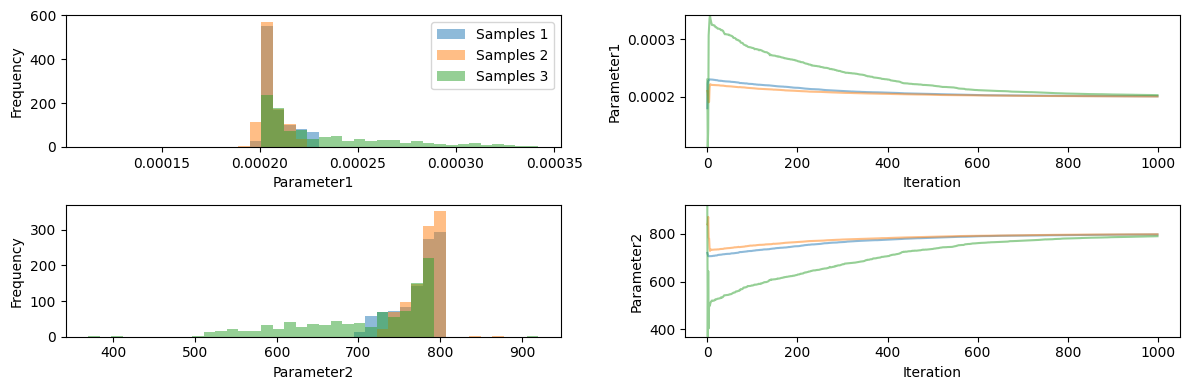

In [4]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Multiplicative noise

In [5]:
noise = 1
values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 1000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_61096/2578836283.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     120     0:00.6
2     201     0:01.0
3     279     0:01.4
20    1422    0:07.3
40    3075    0:15.7
60    4617    0:23.6
80    6414    0:32.8
100   8019    0:40.9
120   9672    0:49.1
140   11319   0:58.9
160   12963   1:08.9
180   14643   1:17.7
200   16566   1:27.8
220   18246   1:36.4
240   20064   1:45.8
260   21762   1:54.8
280   23568   2:05.8
300   25314   2:15.8
320   27060   2:26.7
340   28998   2:37.3
360   30879   2:46.9
380   32679   2:56.0
400   34470   3:05.2
420   36183   3:13.9
440   37887   3:22.8
460   39690   3:32.3
480   41391   3:41.0
500   43158   3:50.0
520   44943   3:59.0
540   46689   4:08.0
560   48480   4:17.3
580   50265   4:26.4
600   52044   4:35.6
620   53736   4:44.2
640   55464   4:52.9
660   57342   5:02.8
680   59220   5:12.3
700   61038   5:21.7
720   62946   5:31.3
740   64749   5:40.6
760   66426   5:49.1
780   68295   5:

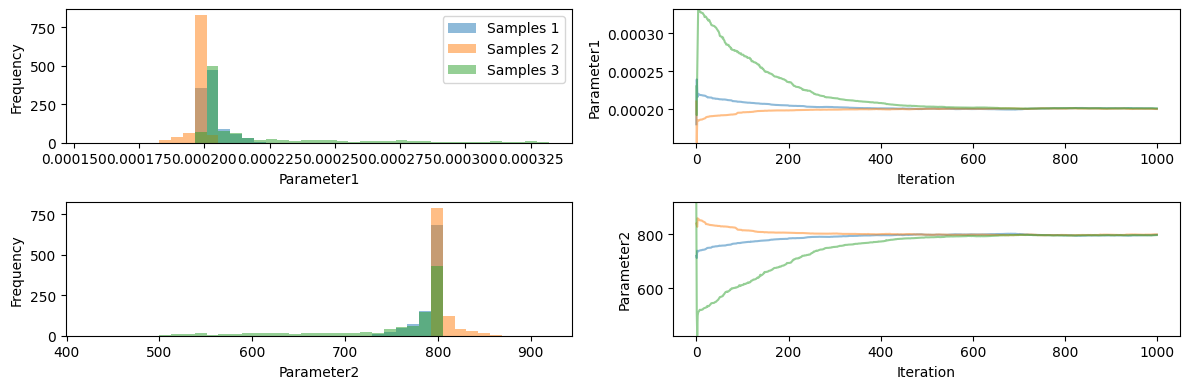

In [6]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()

Additive noise

In [7]:
noise = 1
values = org_values + noise * np.random.normal(0, 0.25, org_values.shape)
problem = pints.MultiOutputProblem(model, times, values)
log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0.0001, 1],
    [0.001, 10000]
    )
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)
xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 1000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)

/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_61096/2314294398.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     90      0:00.5
2     186     0:00.9
3     249     0:01.2
20    1944    0:09.9
40    4230    0:21.5
60    6351    0:32.3
80    8622    0:44.0
100   10890   0:55.6
120   13107   1:07.0
140   15429   1:18.8
160   17928   1:31.3
180   20169   1:42.7
200   22377   1:53.8
220   24711   2:05.8
240   26976   2:17.1
260   29343   2:29.1
280   31728   2:41.2
300   33993   2:52.8
320   36330   3:07.3
340   38436   3:18.1
360   40644   3:29.3
380   42969   3:41.2
400   45138   3:52.2
420   47532   4:04.4
440   49881   4:16.7
460   52209   4:28.7
480   54324   4:39.6
500   56568   4:51.1
520   58920   5:03.2
540   61320   5:15.5
560   63510   5:26.7
580   65931   5:39.2
600   68187   5:50.9
620   70284   6:01.7
640   72486   6:13.2
660   74679   6:24.6
680   77046   6:38.4
700   79293   6:49.8
720   81606   7:01.7
740   84096   7:14.6
760   86475   7:26.6
780   88950   7:

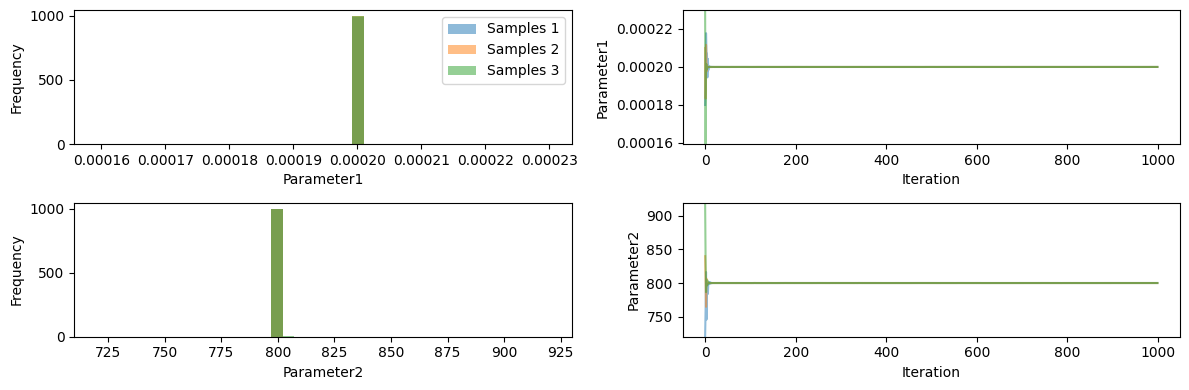

In [8]:
pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()